In [58]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [59]:
!nvidia-smi

Sun Apr  6 16:49:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P0             34W /   70W |    1158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Подготовка дянных

In [60]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [61]:
# Сплит на обучающие и валидационные выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1982)

array([[[ 24,  17,   9],
        [ 16,  12,   7],
        [ 24,  22,  12],
        ...,
        [205, 220, 238],
        [204, 221, 240],
        [207, 217, 229]],

       [[ 14,  13,   9],
        [  4,   9,  12],
        [  2,  10,   4],
        ...,
        [209, 224, 254],
        [207, 225, 255],
        [205, 223, 246]],

       [[ 27,  27,  16],
        [ 19,  25,  24],
        [  7,   9,   5],
        ...,
        [207, 228, 251],
        [207, 228, 253],
        [211, 222, 243]],

       ...,

       [[189, 173, 117],
        [190, 174, 119],
        [196, 176, 124],
        ...,
        [155, 139, 102],
        [185, 167, 129],
        [208, 186, 137]],

       [[200, 180, 135],
        [197, 183, 132],
        [201, 182, 133],
        ...,
        [178, 160, 119],
        [186, 167, 127],
        [204, 180, 132]],

       [[192, 173, 113],
        [195, 180, 120],
        [202, 182, 127],
        ...,
        [220, 190, 137],
        [221, 191, 139],
        [222, 189, 128]]], dtype=uint8)
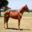

In [62]:
X_train[20000]

In [63]:
y_train[1:5]

array([[0],
       [1],
       [2],
       [7]], dtype=uint8)

In [64]:
# Нормализация данных
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [65]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [66]:
X_train.shape

(40000, 32, 32, 3)

In [67]:
X_train.shape[1:]

(32, 32, 3)

## Задание 1.1
минимизировать многоклассовую кроссэкнропию с помощью sgd. Вам нужно получить сеть, которая достигнет не менее 45% accuracy на тестовых данных.

In [68]:
# Архитектура
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 828,490 (3.16 MB)

 Trainable params: 828,490 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# конвертация меток в one-hot формат
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [70]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [71]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

"""
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.EarlyStopping(patience=3)
]
"""

"\ncallbacks = [\n    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),\n    tf.keras.callbacks.TensorBoard(log_dir='./logs'),\n    tf.keras.callbacks.EarlyStopping(patience=3)\n]\n"

In [72]:
# Определение переменной metrics
metrics = [#keras.metrics.FalseNegatives(name='FN'),
           #keras.metrics.FalsePositives(name='FP'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.F1Score(name='F1Score')]

In [73]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=metrics
)

# Обучение
model.fit(X_train, y_train, batch_size=64, epochs=16, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - F1Score: 0.2456 - loss: 2.0371 - recall: 0.0287 - val_F1Score: 0.3755 - val_loss: 1.7437 - val_recall: 0.0911
Epoch 2/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - F1Score: 0.3660 - loss: 1.7466 - recall: 0.1133 - val_F1Score: 0.3901 - val_loss: 1.6601 - val_recall: 0.1735
Epoch 3/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - F1Score: 0.4022 - loss: 1.6469 - recall: 0.1659 - val_F1Score: 0.4210 - val_loss: 1.6192 - val_recall: 0.1482
Epoch 4/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - F1Score: 0.4177 - loss: 1.5887 - recall: 0.1863 - val_F1Score: 0.4086 - val_loss: 1.6025 - val_recall: 0.1994
Epoch 5/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - F1Score: 0.4366 - loss: 1.5550 - recall: 0.2084 - val_F1Score: 0.4372 - val_loss: 1.5413 - val_recall: 0.2165
Epoch 6/16
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - F1Score: 0.4585 - loss: 1.5068 - recall: 0.2335 - val_F1Score: 0.4024 - val_loss: 1.6064 - val_recall: 0.2244
Epoch 7/16
625/6

In [74]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Test_acc = 0.4811
 Not bad!


## **Задание 1.2**
Карманная сверточная сеть

Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [75]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # Загрузка данных

In [76]:
# Исправление формы меток (методом squeeze убираю лишние измерения)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [77]:
y_train[1:5]

array([9, 9, 4, 1], dtype=uint8)

In [78]:
# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1982)

In [79]:
# Преобразование меток в one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_val_cat = keras.utils.to_categorical(y_val, num_classes=10)

In [80]:
y_val_cat[-2:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [81]:
# Нормализация данных
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [82]:
model_mod = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),     # Входной слой
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1,1), dilation_rate=(1, 1), activation='relu',  padding='same'), # Свёртка 3x3 с 10 фильтрами, padding='same' (c обрамлением!)
    tf.keras.layers.Activation('relu'),                 # Нелинейность
    tf.keras.layers.MaxPooling2D((2, 2)),               # Max-pooling 2x2
    tf.keras.layers.Flatten(),                          # Flatten
    tf.keras.layers.Dense(100),                         # Полносвязный слой на 100 нейронов
    tf.keras.layers.Activation('relu'),                 # Нелинейность
    tf.keras.layers.Dense(10, activation='softmax')     # Выходной слой
])

model_mod.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │         256,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,390 (1005.43 KB)

 Trainable params: 257,390 (1005.43 KB)

 Non-trainable params: 0 (0.00 B)

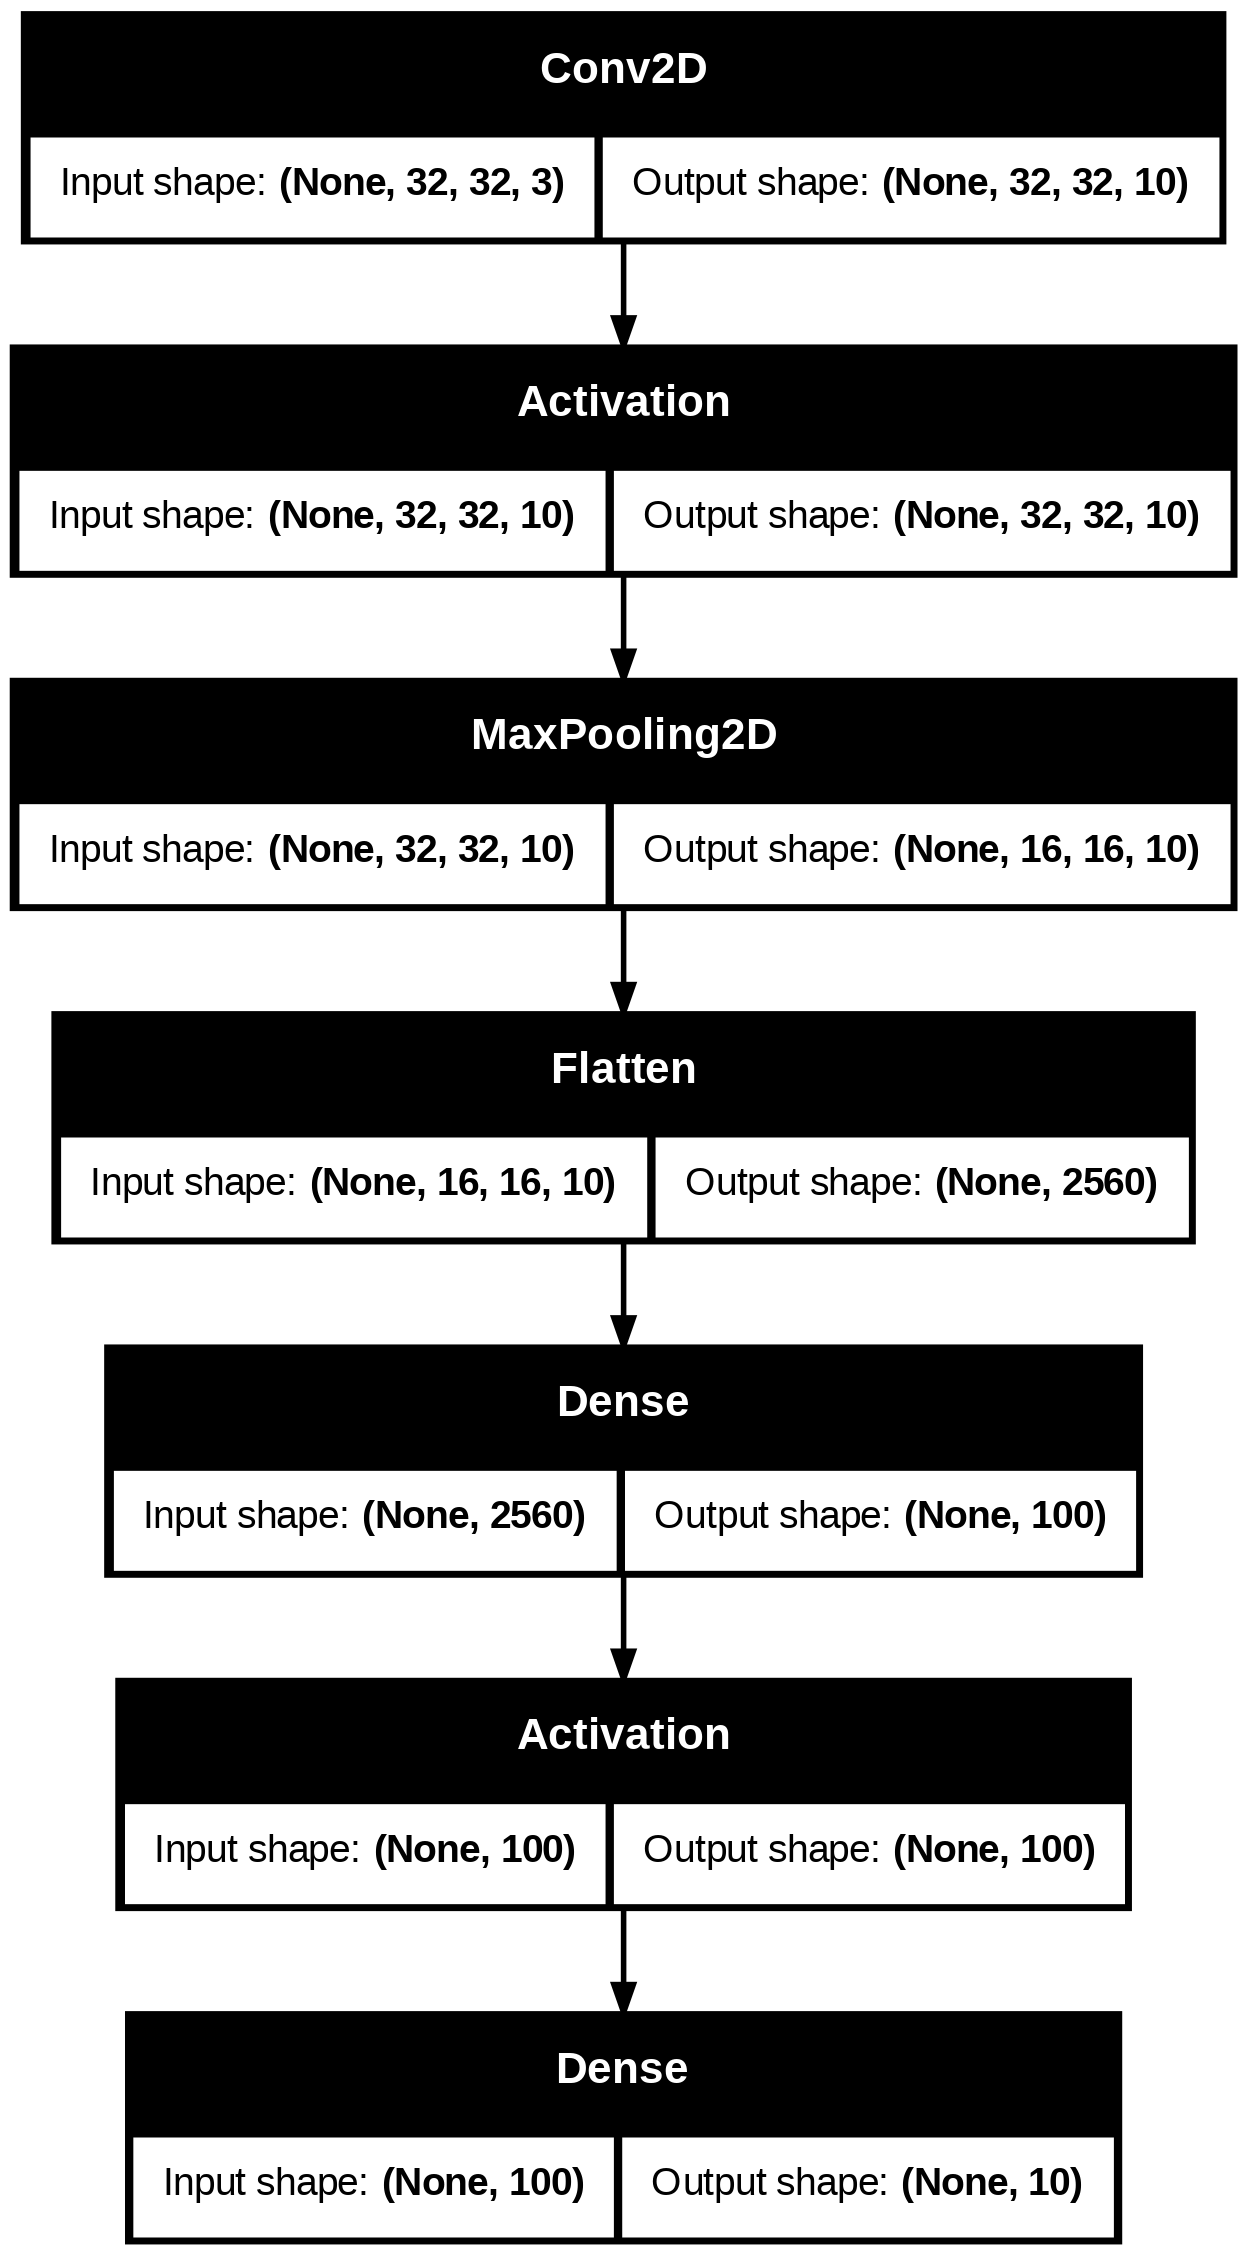

In [83]:
keras.utils.plot_model(model_mod, show_shapes=True, to_file='model_mod.png')

In [84]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

"""
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.EarlyStopping(patience=3)
]
"""

"\ncallbacks = [\n    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),\n    tf.keras.callbacks.TensorBoard(log_dir='./logs'),\n    tf.keras.callbacks.EarlyStopping(patience=3)\n]\n"

In [85]:
# Определение переменной metrics
metrics = [#keras.metrics.FalseNegatives(name='FN'),
           #keras.metrics.FalsePositives(name='FP'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.F1Score(name='F1Score')]

In [86]:
# Функция потерь для многоклассовой классификации и скорость обучения 0.001
model_mod.compile(
    optimizer=keras.optimizers.Adam(0.001), # Обновление весов: выбран оптимизатор Адам
    loss="categorical_crossentropy",        # Функция потерь
    metrics=metrics
)

In [87]:
model_mod.fit(
    X_train, y_train_cat,
    batch_size=64,
    epochs=32,
    callbacks=callbacks,
    validation_data=(X_val, y_val_cat)
)

Epoch 1/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - F1Score: 0.3396 - loss: 1.8056 - recall: 0.0820 - val_F1Score: 0.4651 - val_loss: 1.4353 - val_recall: 0.2610
Epoch 2/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - F1Score: 0.5184 - loss: 1.3497 - recall: 0.2881 - val_F1Score: 0.5425 - val_loss: 1.2987 - val_recall: 0.3338
Epoch 3/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - F1Score: 0.5675 - loss: 1.2222 - recall: 0.3631 - val_F1Score: 0.5564 - val_loss: 1.2326 - val_recall: 0.4058
Epoch 4/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - F1Score: 0.6020 - loss: 1.1259 - recall: 0.4271 - val_F1Score: 0.5780 - val_loss: 1.2054 - val_recall: 0.4214
Epoch 5/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - F1Score: 0.6262 - loss: 1.0673 - recall: 0.4639 - val_F1Score: 0.5924 - val_loss: 1.1568 - val_recall: 0.4546
Epoch 6/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - F1Score: 0.6394 - loss: 1.0177 - recall: 0.4890 - val_F1Score: 0.6065 - val_loss: 1.1421 - val_recall: 0.4696
Epoch 7/32
625/6

In [88]:
from sklearn.metrics import accuracy_score, f1_score

predict_x=model_mod.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print(f'\n Test_acc ={test_acc}')
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Test_acc =0.6201
 Not bad!


In [89]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      1000
           1       0.80      0.70      0.75      1000
           2       0.55      0.40      0.47      1000
           3       0.46      0.38      0.42      1000
           4       0.51      0.61      0.55      1000
           5       0.49      0.59      0.53      1000
           6       0.60      0.77      0.68      1000
           7       0.72      0.67      0.70      1000
           8       0.71      0.77      0.74      1000
           9       0.67      0.70      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



### архитектура model_mod_2

In [91]:
# Улучшенная архитектура с CNN
model_mod_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    # Сверточные слои для извлечения признаков изображений (modul feature extractor)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),   # Свёртка 3x3 с 32 фильтрами
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),   # Свёртка 3x3 с 64 фильтрами
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Свёртка 3x3 с 128 фильтрами
    tf.keras.layers.MaxPooling2D((2, 2)),
    ## modul Clf
    # Преобразование в одномерный вектор
    tf.keras.layers.Flatten(),
    # Полносвязные слои с большим количеством нейронов
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Предотвращение переобучения
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_mod_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,262 (1.16 MB)

 Trainable params: 305,262 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

"""
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.EarlyStopping(patience=3)
]
"""

"\ncallbacks = [\n    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),\n    tf.keras.callbacks.TensorBoard(log_dir='./logs'),\n    tf.keras.callbacks.EarlyStopping(patience=3)\n]\n"

In [93]:
# Определение переменной metrics
metrics = [#keras.metrics.FalseNegatives(name='FN'),
           #keras.metrics.FalsePositives(name='FP'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.F1Score(name='F1Score')]

In [94]:
# Функция потерь для многоклассовой классификации и скорость обучения 0.001
model_mod_2.compile(
    optimizer=keras.optimizers.Adam(0.001), # Обновление весов: выбран оптимизатор Адам
    loss="categorical_crossentropy",        # Функция потерь
    metrics=metrics
)

In [95]:
model_mod_2.fit(
    X_train, y_train_cat,
    batch_size=64,
    epochs=32,
    callbacks=callbacks,
    validation_data=(X_val, y_val_cat)
)

Epoch 1/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - F1Score: 0.2674 - loss: 1.9067 - recall: 0.0622 - val_F1Score: 0.4998 - val_loss: 1.3213 - val_recall: 0.2974
Epoch 2/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - F1Score: 0.5238 - loss: 1.2996 - recall: 0.3285 - val_F1Score: 0.5784 - val_loss: 1.1082 - val_recall: 0.4674
Epoch 3/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - F1Score: 0.6158 - loss: 1.0735 - recall: 0.4647 - val_F1Score: 0.6731 - val_loss: 0.9407 - val_recall: 0.5236
Epoch 4/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - F1Score: 0.6631 - loss: 0.9481 - recall: 0.5368 - val_F1Score: 0.7005 - val_loss: 0.8648 - val_recall: 0.6068
Epoch 5/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - F1Score: 0.6992 - loss: 0.8496 - recall: 0.5897 - val_F1Score: 0.7173 - val_loss: 0.8097 - val_recall: 0.6306
Epoch 6/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - F1Score: 0.7283 - loss: 0.7682 - recall: 0.6343 - val_F1Score: 0.7286 - val_loss: 0.7876 - val_recall: 0.6662
Epoch 7/32
625/6

In [96]:
from sklearn.metrics import accuracy_score, f1_score

predict_x=model_mod_2.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print(f'\n Test_acc ={test_acc}')
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

 Test_acc =0.738
 Not bad!


In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.87      0.84      0.86      1000
           2       0.68      0.62      0.65      1000
           3       0.51      0.58      0.54      1000
           4       0.73      0.67      0.70      1000
           5       0.60      0.64      0.62      1000
           6       0.86      0.73      0.79      1000
           7       0.76      0.81      0.79      1000
           8       0.86      0.84      0.85      1000
           9       0.81      0.84      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



### N.B. Метод squeeze

In [98]:
mass = np.array([[[1], [2], [3]]])
mass

array([[[1],
        [2],
        [3]]])

In [99]:
np.squeeze(mass, axis=0), np.squeeze(mass)

(array([[1],
        [2],
        [3]]),
 array([1, 2, 3]))

In [100]:
# Понимание 3n массива
import numpy as np
from PIL import Image

# Загрузка изображения
img = np.array(Image.open('IMG_20241210_144432.jpg'))

# Проверка размеров
print(img.shape)  # Например: (1080, 1920, 3)

# Доступ к отдельному пикселю (строка 500, столбец 700)
pixel = img[500, 700]
print(pixel)  # Например: [120, 80, 200] - значения RGB

# Значение только красного канала для этого пикселя
red_value = img[500, 700, 0]
print(red_value)  # Например: 120


FileNotFoundError: [Errno 2] No such file or directory: 'IMG_20241210_144432.jpg'